This datset is taken from Kaggle, but originally contains data from steamspy, which contains all data and statistics about steam games. The dataset contains information about 27,000 steam games: the ratings, playtime, in game achievements, developer, publihsers, genre tags and so on. 
The aim of the dataset is to estimate the number of prospective user base, which is a parameter for the success of the game. The user base of games that are paid can be direct sales data. And for games that are free to play, user count will contribute to other revenue streams for the game such as ads, fremium in-game purchases.
We will be using different Machine learning models to estimate the user base of a game given a set of input parameters. For the context of this code, the test data will be a part of the whole dataset being read.

# Importing libaries and reading dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb

import pandas as pd
# url='https://www.kaggle.com/datasets/nikdavis/steam-store-games?select=steam.csv' URL for the dataset
url= "https://drive.google.com/uc?id=1JA28_8ePq3G6i4G6mhI94Rp8_np3aQV7&authuser=0&export=download" #dataset from my google drive public link
#extract_csv=pd.read_csv('/content/drive/Shareddrives/Assignement python/steam_data.csv')
extract_csv=pd.read_csv(url)
extract_csv.sample(2) #extract_csv is the main dataframe having the extracted data



,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
2541,274940,Depth,2014-11-03,1,Digital Confectioners,Digital Confectioners,windows,0,Single-player;Multi-player;Online Multi-Player...,Action;Indie,Action;Multiplayer;Gore,40,22385,3472,791,486,1000000-2000000,14.99
17717,724390,Rigid Force Alpha,2018-08-31,1,com8com1 Software,com8com1 Software,windows,0,Single-player;Steam Achievements;Full controll...,Action;Indie,Action;Indie;Shoot 'Em Up,40,43,9,0,0,0-20000,15.49


# Data Cleaning

In [2]:
steam=extract_csv.copy() #steam is a copy of the extract_csv dataframe to perform the data cleaning, often a copy is created to debug and rerun codes

In [3]:
steam = steam.astype({'release_date':'string','developer':'string','publisher':'string','genres':'string','owners':'string'}) #converting to string type for easier cleaning

In [4]:
steam.sample(10)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
16109,679190,The Hunting God,2017-07-28,1,Tonguç Bodur,Tonguç Bodur,windows,0,Single-player;Steam Achievements;Partial Contr...,Adventure;Casual;Indie,Adventure;Indie;Casual,6,38,16,0,0,0-20000,2.49
6879,404480,SC2VN - The eSports Visual Novel,2015-09-22,1,Team Eleven,Team Eleven,windows;mac;linux,0,Single-player,Adventure;Casual;Free to Play;Indie;RPG;Simula...,Visual Novel;Anime;Free to Play,0,786,59,135,154,100000-200000,0.00
24781,944610,Automobiels and the Eisenhower Hiway System th...,2018-11-01,1,Jeffrey Marsh,Jeffrey marsh,windows,0,Single-player;Steam Achievements;Includes leve...,Adventure,Adventure,7,4,1,0,0,0-20000,0.00
12458,568450,Hoplite,2016-12-14,1,Brimo Studio;Sacred Walrus,Brimo Studio;Sacred Walrus,windows,0,Single-player;Steam Trading Cards,Action;Casual;Indie,Casual;Indie;Action,0,37,19,230,262,50000-100000,0.79
16346,685230,Alienzix,2017-08-25,0,Xero TR-MMXZ;Xeneder,Xitilon,windows,0,Single-player;Shared/Split Screen,Action;Indie,Action;Indie;Arcade,0,23,9,0,0,0-20000,2.09
9645,493100,BellyBots,2016-07-26,1,Grumpy Company GmbH,Grumpy Company GmbH,windows,0,Single-player;Steam Achievements;Steam Leaderb...,Indie;Early Access,Early Access;Indie;VR,10,29,5,0,0,0-20000,5.59
21572,838390,Merry Glade,2018-05-11,1,Anatoliy Loginovskikh,Anatoliy Loginovskikh,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Indie;Casual;Adventure,76,94,1,0,0,0-20000,2.09
21940,848700,Toki Time Trial,2018-07-20,1,DigiPen Press,DigiPen Press,windows,0,Single-player,Free to Play,Free to Play;Puzzle,0,42,4,0,0,0-20000,0.00
8906,464000,Arcade Saga,2016-12-08,1,2 Bears Studio,Vive Studios,windows,0,Single-player;Multi-player;Online Multi-Player...,Action;Casual;Sports,Action;Casual;Sports,72,30,10,0,0,0-20000,14.99
4668,345030,3d Engineers,2015-10-19,1,Robert Dahlenburg,Dahlenburg,windows,0,Single-player,Simulation,Simulation;Building;Physics,0,10,13,0,0,0-20000,4.79


In [5]:
steam=steam.drop(columns=['appid','english','categories','steamspy_tags', 'required_age']) #dropping unrelated columns to problem statement
steam.reset_index(drop=True, inplace=True)

In [6]:
steam.rename(columns={'release_date': 'date'}, inplace=True)


In [7]:
steam['year'] = steam['date'].str.extract(r'^(\d{4})')
steam['year']=steam['year'].fillna("-2000")

In [8]:
steam = steam[steam['date'] > '2000']


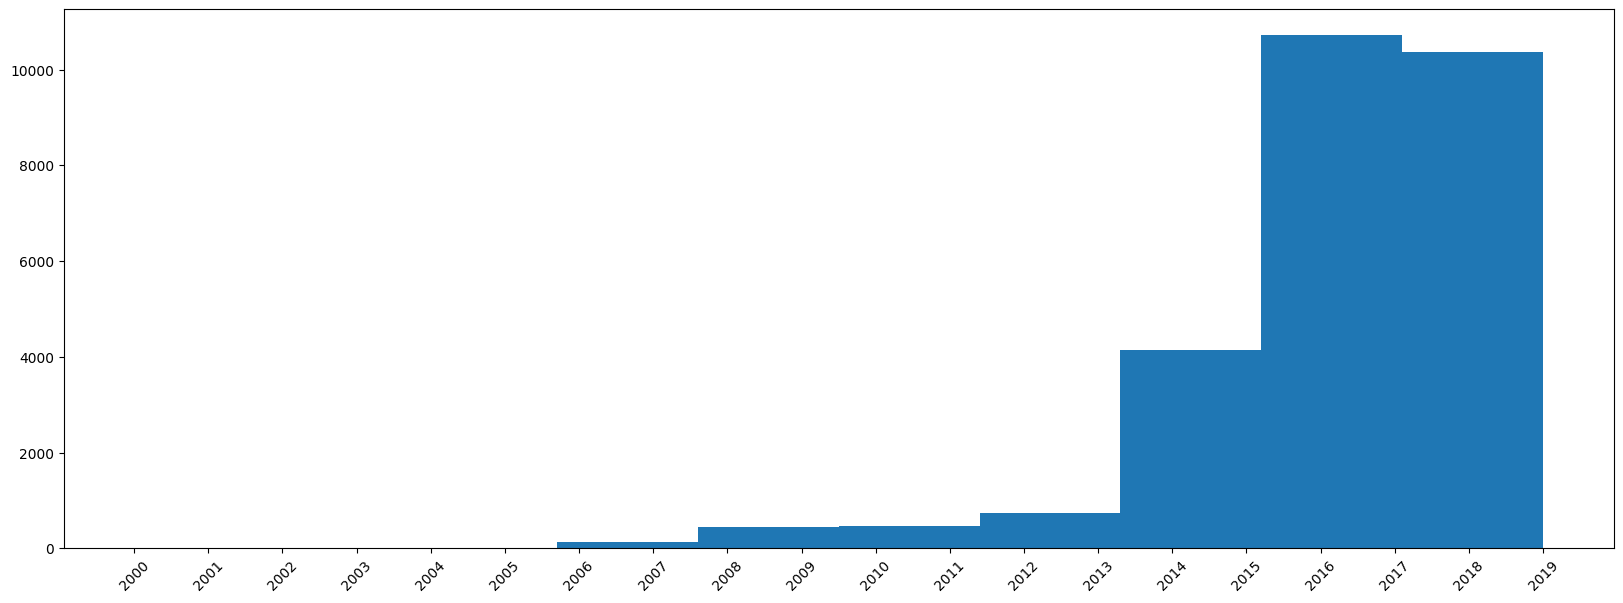

In [9]:
sorted_years=np.sort(steam['year'])
plt.figure(figsize=(20,7))
plt.hist(sorted_years)

plt.xticks(rotation=45)
plt.show()

In [10]:
steam['owners'] = steam['owners'].apply(lambda x: x.split('-')[1])


In [11]:
steam=steam.drop_duplicates(subset='name', keep='first')


In [12]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27029 entries, 0 to 27074
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              27029 non-null  object 
 1   date              27029 non-null  string 
 2   developer         27029 non-null  string 
 3   publisher         27029 non-null  string 
 4   platforms         27029 non-null  object 
 5   genres            27029 non-null  string 
 6   achievements      27029 non-null  int64  
 7   positive_ratings  27029 non-null  int64  
 8   negative_ratings  27029 non-null  int64  
 9   average_playtime  27029 non-null  int64  
 10  median_playtime   27029 non-null  int64  
 11  owners            27029 non-null  object 
 12  price             27029 non-null  float64
 13  year              27029 non-null  object 
dtypes: float64(1), int64(5), object(4), string(4)
memory usage: 3.1+ MB


In [13]:
steam=steam.drop(columns=['name','date','developer','publisher'])
steam.reset_index(drop=True, inplace=True)

In [14]:
steam.sample(2)
steam = steam.astype({'platforms':'string'})

# One Hot Encoding

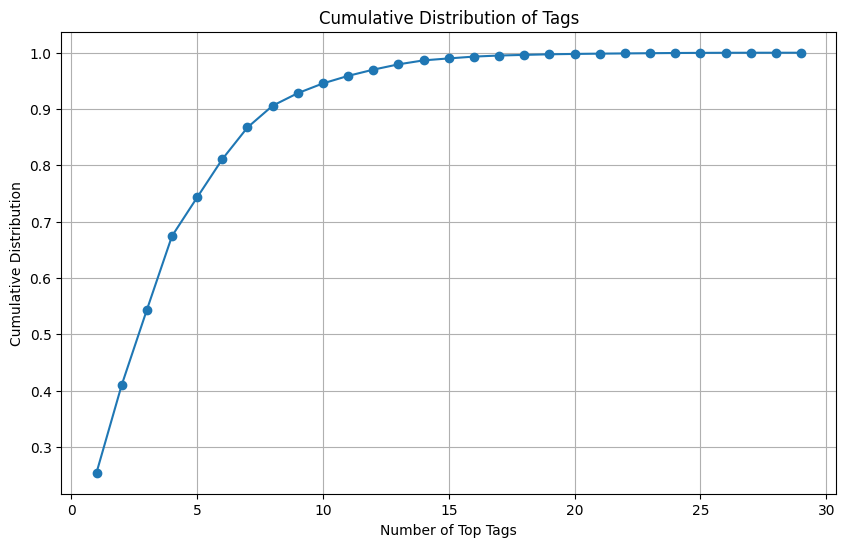

In [15]:
#Cumulative distribution to understand how many genres (parameters) to encode

tags_list = steam['genres'].str.split(';').apply(pd.Series).stack().reset_index(drop=True)

tag_counts = tags_list.value_counts()

cumulative_dist = tag_counts.cumsum() / tag_counts.sum()

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_dist) + 1), cumulative_dist.values, marker='o')
plt.xlabel('Number of Top Tags')
plt.ylabel('Cumulative Distribution')
plt.title('Cumulative Distribution of Tags')
plt.grid()
plt.show()


In [16]:
#90-100% is the recommended range for optimum number of tags,when the dataset is not very huge
#80-90%  is the recommended range for very large datasets
#Since we have only around 29 tags, we can use 13 tags(less than half the number of tags)

In [17]:
#One Hot encoding for the parameter variables (Genres)

tags = steam['genres'].str.split(';').explode()
tag_counts = tags.value_counts().head(13) #Using the top 13 genre tags 
tag_counts_df = pd.DataFrame({'Tag': tag_counts.index, 'Count': tag_counts.values})

tag_counts_df.info()
tags_to_encode = tag_counts_df['Tag']
tags_encoded = pd.get_dummies(steam['genres'].str.split(';', expand=True).stack())[tags_to_encode].sum(level=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tag     13 non-null     object
 1   Count   13 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 336.0+ bytes


<ipython-input-17-96e766703eb9>:9: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  tags_encoded = pd.get_dummies(steam['genres'].str.split(';', expand=True).stack())[tags_to_encode].sum(level=0)


In [18]:
tags_encoded

,Indie,Action,Casual,Adventure,Strategy,Simulation,RPG,Early Access,Free to Play,Sports,Racing,Violent,Massively Multiplayer
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27024,1,0,1,1,0,0,0,0,0,0,0,0,0
27025,1,1,0,1,0,0,0,0,0,0,0,0,0
27026,1,1,1,0,0,0,0,0,0,0,0,0,0
27027,1,0,1,1,0,0,0,0,0,0,0,0,0


In [19]:
final=pd.concat([steam,tags_encoded], axis=1) #final is the dataframe of steam and encoded genres
final=final.drop(columns=['genres'])
final.reset_index(drop=True, inplace=True)
final.sample(2)


,platforms,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,year,Indie,...,Adventure,Strategy,Simulation,RPG,Early Access,Free to Play,Sports,Racing,Violent,Massively Multiplayer
10508,windows,0,15,3,0,0,20000,6.99,2016,0,...,1,0,0,0,0,0,0,0,0,0
7910,windows,46,1594,289,0,0,100000,29.99,2017,1,...,0,1,0,0,0,0,0,0,0,0


In [20]:
#Encoding the Platforms tag column
#all the variable names are similar to the genre encoding, inaddition they have the letter 'p' to signify platforms
tagsp = steam['platforms'].str.split(';').explode()

tag_countsp = tagsp.value_counts()
tag_counts_dfp = pd.DataFrame({'Tag': tag_countsp.index, 'Count': tag_countsp.values})

tag_counts_dfp.info()


tags_to_encodep = tag_counts_dfp['Tag']

tags_encodedp = pd.get_dummies(steam['platforms'].str.split(';', expand=True).stack())[tags_to_encodep].sum(level=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tag     3 non-null      object
 1   Count   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


<ipython-input-20-06518968697e>:13: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  tags_encodedp = pd.get_dummies(steam['platforms'].str.split(';', expand=True).stack())[tags_to_encodep].sum(level=0)


In [21]:
tags_encodedp

,windows,mac,linux
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
27024,1,0,0
27025,1,0,0
27026,1,0,0
27027,1,1,0


In [22]:
df=pd.concat([final,tags_encodedp], axis=1)
df=df.drop(columns=['platforms'])
df.reset_index(drop=True, inplace=True)
df.sample(2) #encoded dataframe, 'df' is the dataframe with all the parameter variable columns encoded

,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,year,Indie,Action,...,RPG,Early Access,Free to Play,Sports,Racing,Violent,Massively Multiplayer,windows,mac,linux
13235,8,2076,138,114,127,200000,3.99,2017,1,0,...,0,0,0,0,0,1,0,1,1,1
3430,35,55,31,162,253,50000,4.79,2015,1,1,...,1,0,0,0,0,0,0,1,1,1


In [23]:
col = df.pop(df.columns[5]) #Removing the target variable column (Owners)
#adding target variable back to the -1 position
df['users'] = col
df.describe(include='all')

,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,year,Indie,Action,Casual,...,Early Access,Free to Play,Sports,Racing,Violent,Massively Multiplayer,windows,mac,linux,users
count,27029.000000,2.702900e+04,27029.000000,27029.000000,27029.000000,27029.000000,27029,27029.000000,27029.000000,27029.000000,...,27029.000000,27029.000000,27029.000000,27029.000000,27029.000000,27029.000000,27029.000000,27029.000000,27029.000000,27029
unique,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
top,NaN,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000
freq,NaN,NaN,NaN,NaN,NaN,NaN,8138,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18558
mean,45.313996,1.000852e+03,211.286063,149.969218,146.274631,6.081856,NaN,0.717415,0.439528,0.377002,...,0.109105,0.062969,0.048873,0.037774,0.031189,0.026712,0.999815,0.297939,0.193274,NaN
std,352.966066,1.900412e+04,4288.571886,1828.566829,2355.874572,7.879510,NaN,0.450265,0.496339,0.484645,...,0.311777,0.242912,0.215607,0.190653,0.173831,0.161244,0.013600,0.457361,0.394873,NaN
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,6.000000e+00,2.000000,0.000000,0.000000,1.690000,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
50%,7.000000,2.400000e+01,9.000000,0.000000,0.000000,3.990000,NaN,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
75%,23.000000,1.260000e+02,42.000000,0.000000,0.000000,7.190000,NaN,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN


In [24]:
df['year'] = df['year'].astype(int)
df['users'] = df['users'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27029 entries, 0 to 27028
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   achievements           27029 non-null  int64  
 1   positive_ratings       27029 non-null  int64  
 2   negative_ratings       27029 non-null  int64  
 3   average_playtime       27029 non-null  int64  
 4   median_playtime        27029 non-null  int64  
 5   price                  27029 non-null  float64
 6   year                   27029 non-null  int64  
 7   Indie                  27029 non-null  uint8  
 8   Action                 27029 non-null  uint8  
 9   Casual                 27029 non-null  uint8  
 10  Adventure              27029 non-null  uint8  
 11  Strategy               27029 non-null  uint8  
 12  Simulation             27029 non-null  uint8  
 13  RPG                    27029 non-null  uint8  
 14  Early Access           27029 non-null  uint8  
 15  Fr

#Exploratory Data Analysis

In [25]:
game=df.copy()

In [26]:
game.sample(2)

,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,year,Indie,Action,Casual,...,Early Access,Free to Play,Sports,Racing,Violent,Massively Multiplayer,windows,mac,linux,users
610,0,33,8,0,0,6.99,2009,0,0,0,...,0,0,0,0,0,0,1,0,0,50000
15925,0,2,1,0,0,1.99,2017,0,0,0,...,1,0,0,0,1,0,1,0,0,20000


<Axes: >

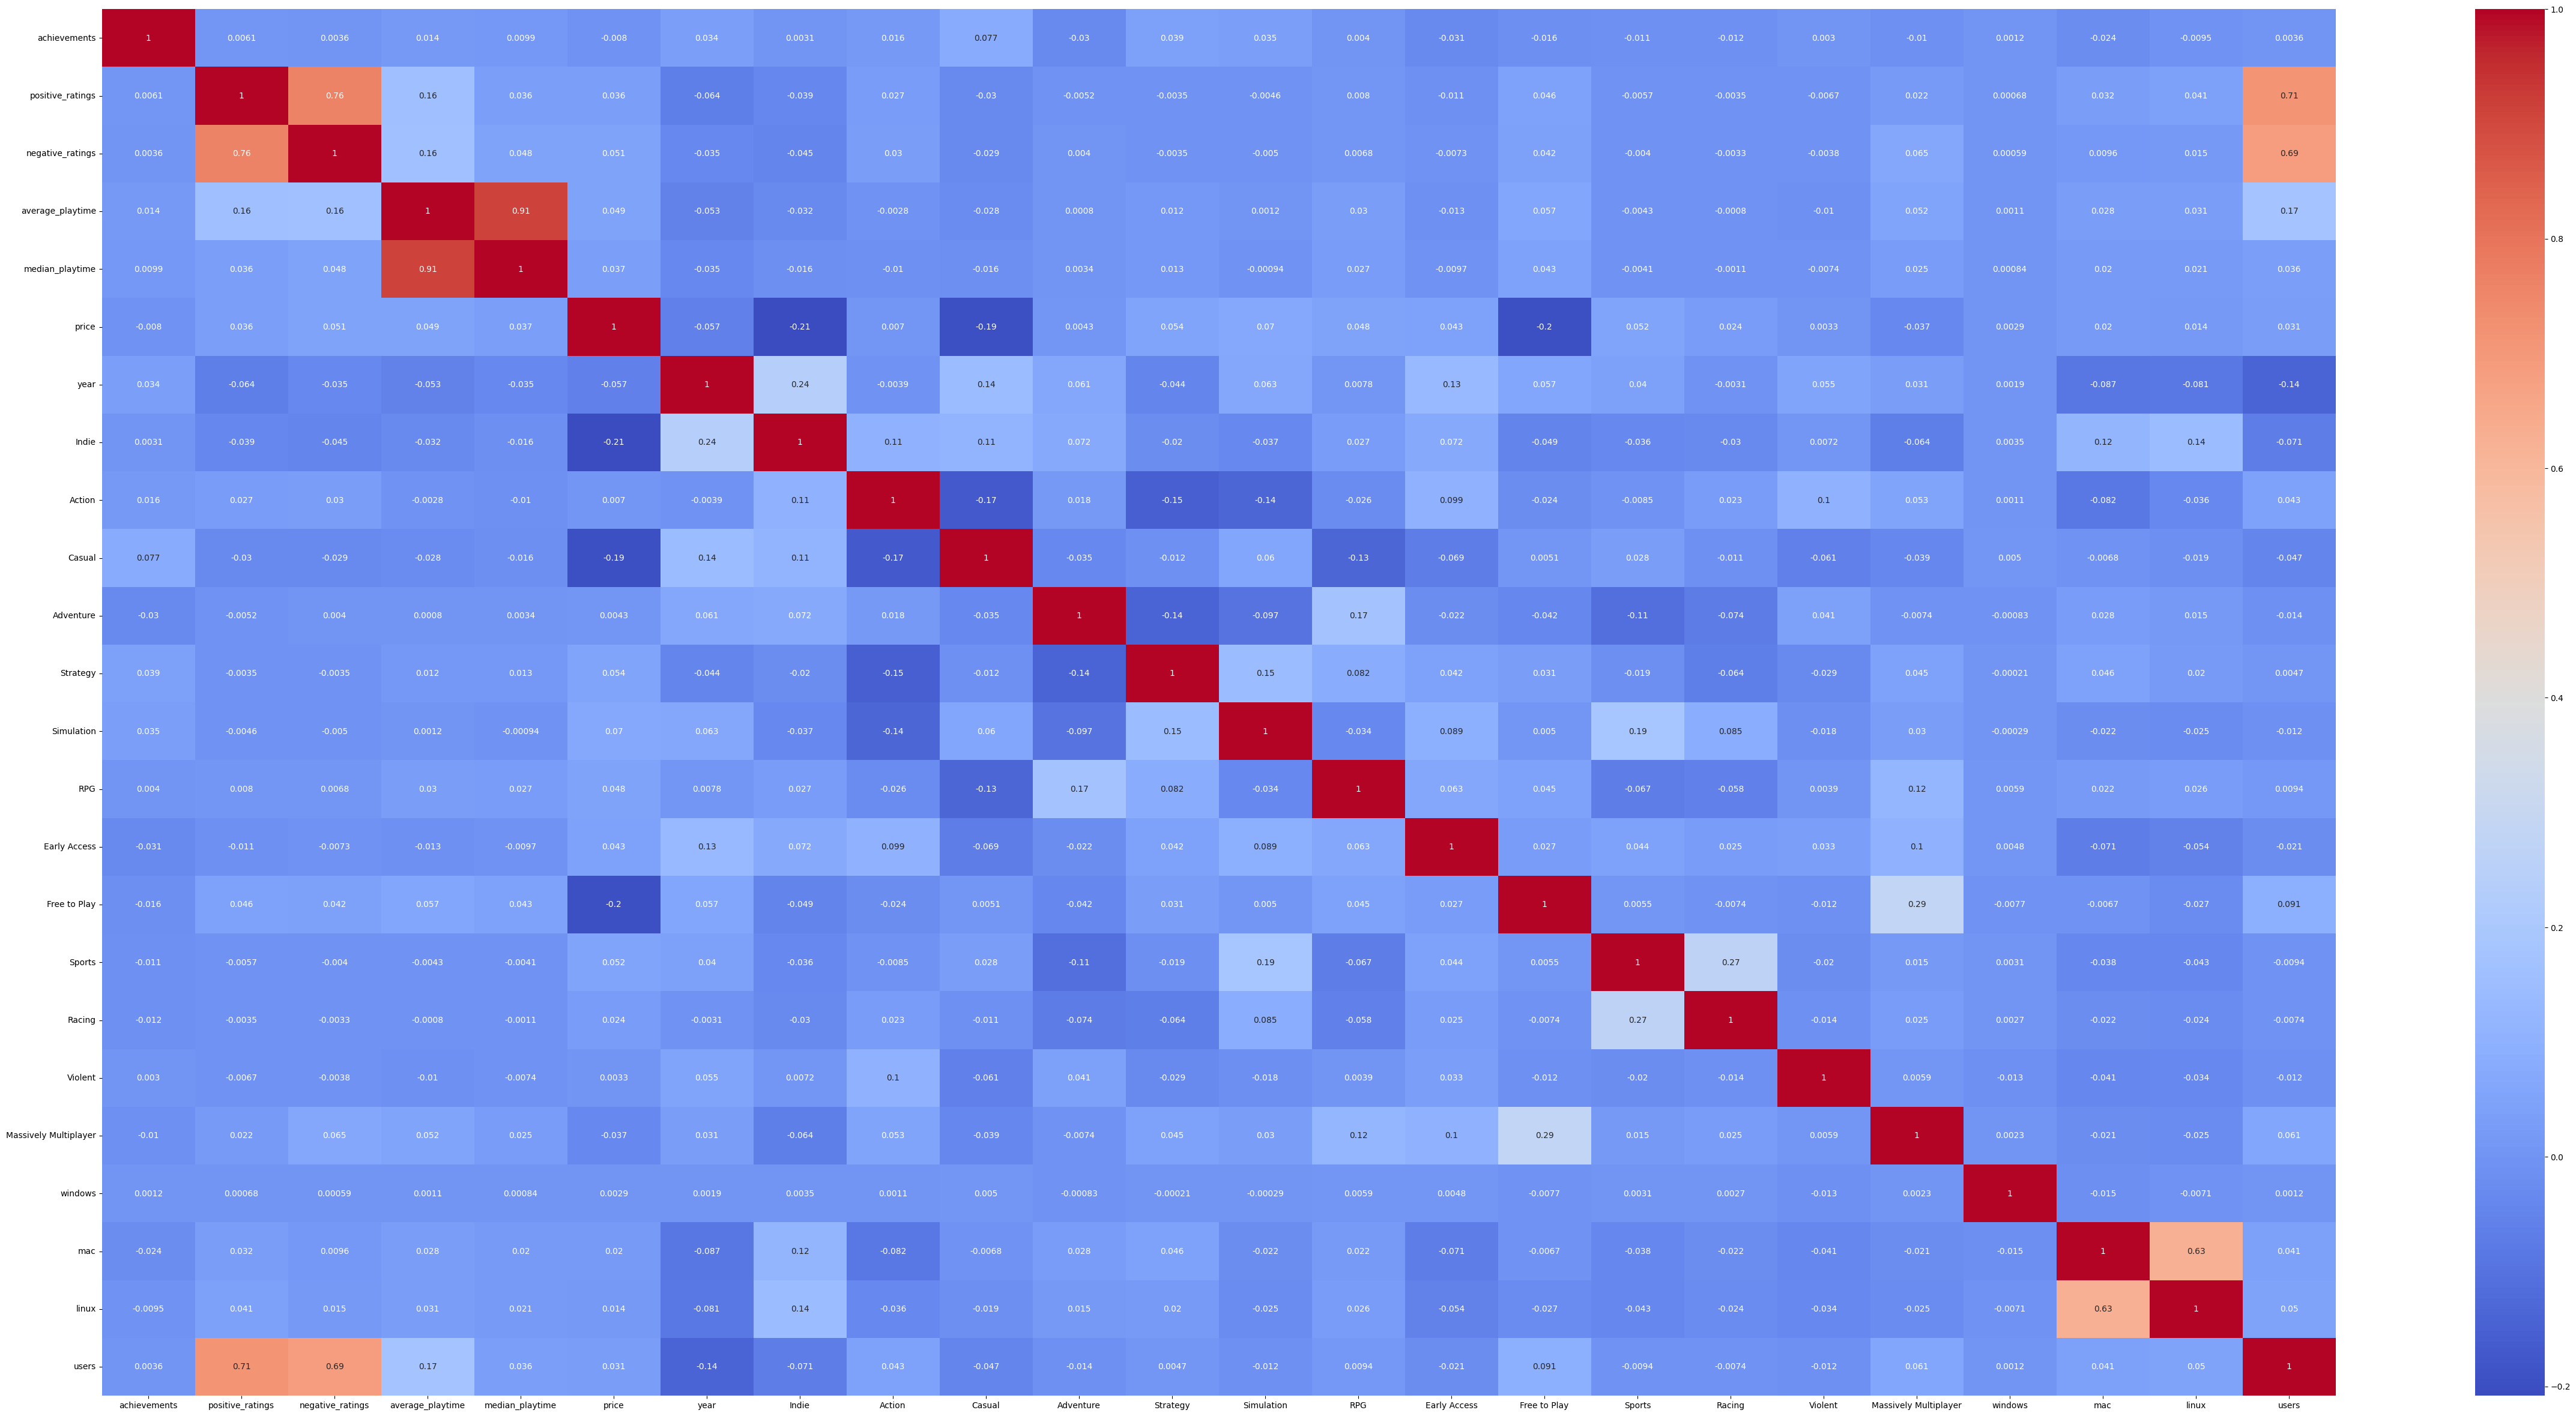

In [27]:
fig,ax= plt.subplots()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
fig.set_size_inches(60,30)
sns.heatmap(game.corr(), annot=True, cmap='coolwarm')

Inferences from the heatmap: Interestingly, the heatmap is the simplest way to see direct correlations between two parameters. Here in the last row, we see that the positive and negative ratings have the correlation of 70% with number of users (Y parameter), and they also have correlation within them

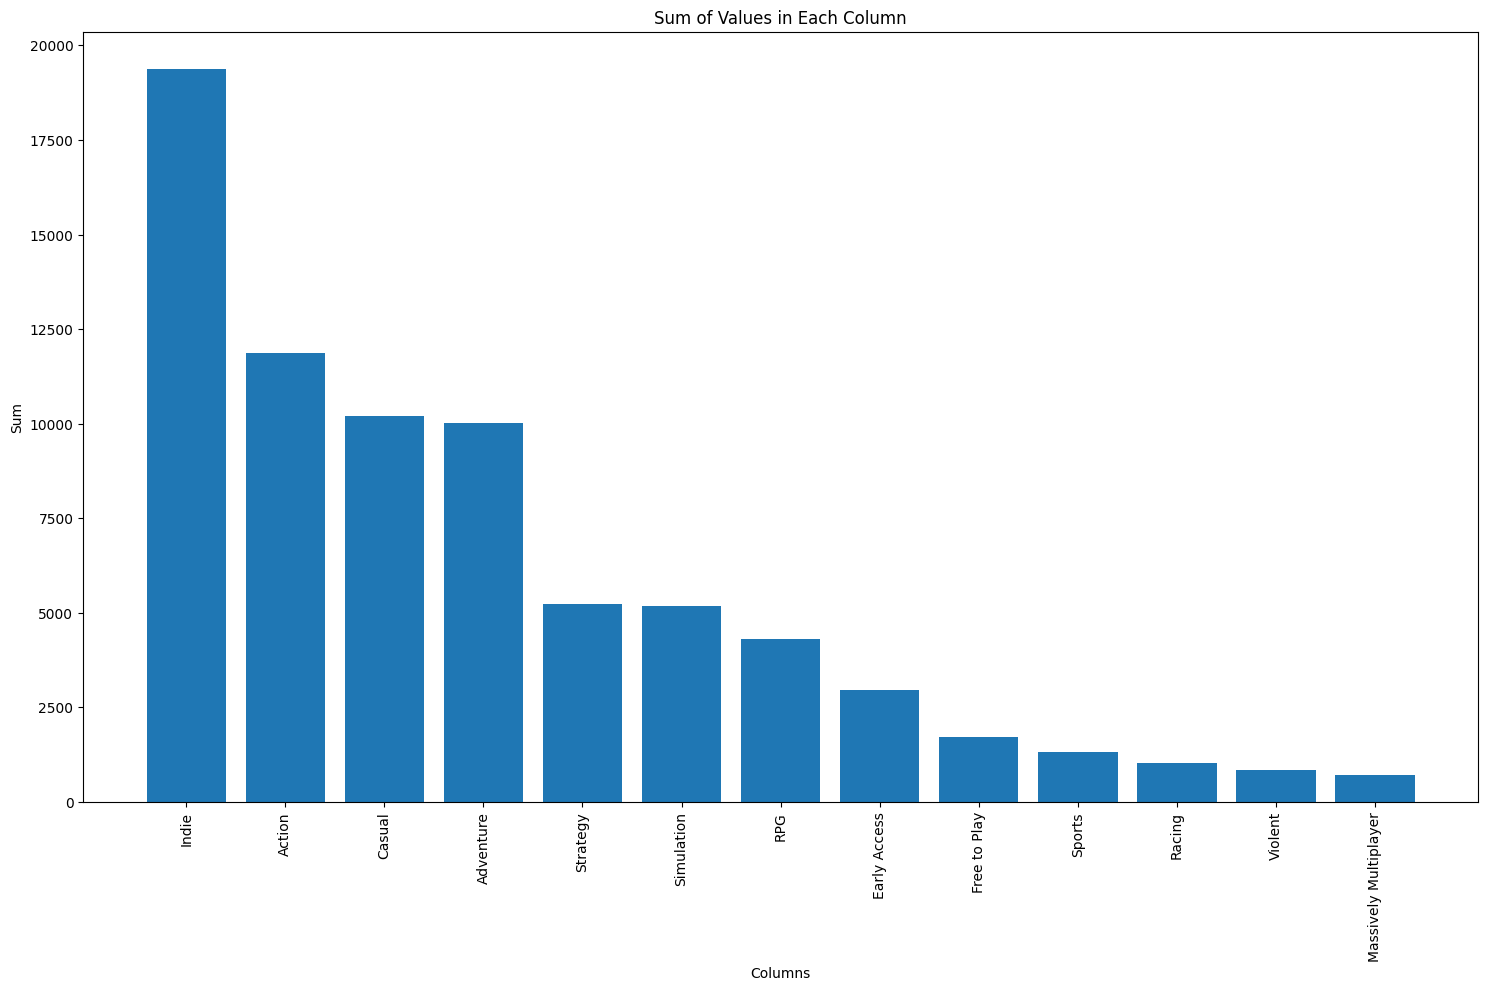

In [28]:
tags = game.drop(['achievements','positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime'	,'price',	'year','mac','linux','windows','users'], axis=1)
column_sumst = tags.sum()
column_namest = list(tags.columns)
plt.figure(figsize=(18, 10))
plt.bar(column_namest, column_sumst)
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Sum of Values in Each Column')
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8)

plt.show()

Indie games are the most number on steam, Indie meaning independent developers making games that are mostly free or lesser in price 
compared to other games, unique experiences and greater community support from players, Indie is then followed by action genre, which 
can comprise many games in gfast, because of the desireability fo the game itself. Now more recently casual games are more in the rise. 
Casual games are more preferred by the non-experienced players as well as advanced gamers. This is more to the reason, that sometimes
people who game are looking for simple fun and casual without absorbing much of their time. In addition, they have simple game mechanics 
and controls , which make them accessible to a lot more of the gaming community

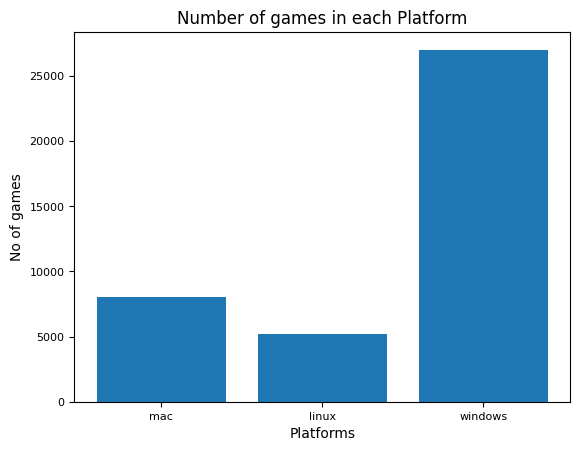

In [29]:
comp=game[['mac','linux','windows']]
column_sums = comp.sum()
column_names = list(comp.columns)
#plt.figure(figsize=(10, 6))
plt.bar(column_names, column_sums)
plt.xlabel('Platforms')
plt.ylabel('No of games')
plt.title('Number of games in each Platform')
plt.show()

Naturally, for gaming, windows is the most popular platform as per the gaming community goes, moreover,the windows platform has more developement tools to play and develop games

In [30]:

game['price'].describe()


count    27029.000000
mean         6.081856
std          7.879510
min          0.000000
25%          1.690000
50%          3.990000
75%          7.190000
max        421.990000
Name: price, dtype: float64

We can see that the games start from being free to the price of less than 10 dollars , a few outliers are there which can be pictured in the box plot:

<Axes: >

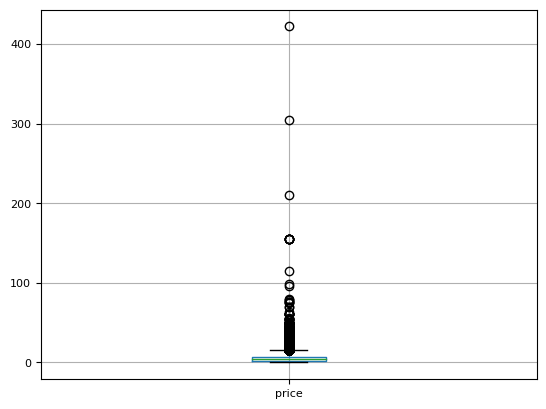

In [31]:
game.boxplot(column=['price'])

# Standard Scaling

In [32]:
scaler = StandardScaler() #Standard scaling to bring all the parameters to the same scale
columns_to_scale = ['achievements', 'positive_ratings','negative_ratings','average_playtime','median_playtime','price','year' ]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [33]:
df.sample(2)

,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,year,Indie,Action,Casual,...,Early Access,Free to Play,Sports,Racing,Violent,Massively Multiplayer,windows,mac,linux,users
7607,-0.128383,-0.052561,-0.049268,-0.082016,-0.062090,-0.265485,-0.698332,1,1,0,...,0,0,0,0,0,0,1,0,0,20000
16531,0.024609,0.000850,0.106964,-0.025140,-0.017945,4.937980,1.165105,0,0,0,...,0,0,1,1,0,0,1,0,0,100000


# Machine Learning models

In order to find the best machine learning model, we run a few models and print the respective accuracy. The model with the best accuracy for the classification will be taken as final. 

The models being run are Random forest, Random forest with grid search optimisation, K-nearest neighbour (KNN), Support Vector Machine (SVM) and Extreme Gradient Boosting (XGBoost)

In [34]:
#Random forest classifier

X = df.drop('users', axis=1)
y = df['users']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#Grid search optimiser for random forest to get the best hyperparameters
X, y = make_classification()
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Accuracy: 0.7460229374768775
Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.97


In [35]:
#Printing important features from the Random forest model in decreasing importance

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. positive_ratings (0.271732)
2. negative_ratings (0.241564)
3. median_playtime (0.207665)
4. average_playtime (0.151434)
5. year (0.063839)
6. Free to Play (0.020998)
7. price (0.015620)
8. Indie (0.007582)
9. achievements (0.005936)
10. Early Access (0.003400)
11. Casual (0.002829)
12. linux (0.001725)
13. mac (0.001714)
14. Action (0.000713)
15. Simulation (0.000663)
16. Massively Multiplayer (0.000662)
17. RPG (0.000457)
18. Adventure (0.000412)
19. Strategy (0.000384)
20. Violent (0.000273)
21. Sports (0.000217)
22. Racing (0.000177)
23. windows (0.000005)


We can see that importance of negative ratings and postive ratings being the top 2 parameters in estimating the number of User base for the games

In [36]:
#Random forest classifier after grid search 

X = df.drop('users', axis=1)
y = df['users']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=500, max_depth=5, min_samples_split=10, min_samples_leaf=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7439881613022568


In [37]:
#KNN classifier

X = df.drop('users', axis=1)
y = df['users']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7056973732889382


In [38]:
#Support Vector Machine Model (SVM)

X = df.drop('users', axis=1)
y = df['users']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7291897891231964


XGBoost does not take continous integer values for the Y parameters, which in our dataset is the user base. So inorder to run the XGBoost machine learning model, we encode the users column using Label encoding

In [39]:

# Label encoding the users column(Y parameter)

# encode the target variable using LabelEncoder
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['users'])

# print the mapping of the original classes to encoded classes
print('Class mapping:')
for i, class_name in enumerate(le.classes_):
    print(f'{class_name} -> {i}')

df=df.drop(columns=['users'])
df.reset_index(drop=True, inplace=True)

Class mapping:
20000 -> 0
50000 -> 1
100000 -> 2
200000 -> 3
500000 -> 4
1000000 -> 5
2000000 -> 6
5000000 -> 7
10000000 -> 8
20000000 -> 9
50000000 -> 10
100000000 -> 11
200000000 -> 12


In [40]:
#XGBoost model

X = df.drop('target_encoded', axis=1)
y = df['target_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8022567517573067


The XGBoost model gives the highest accuracy of 80.225% because the models ability to not fix the hyper parameters

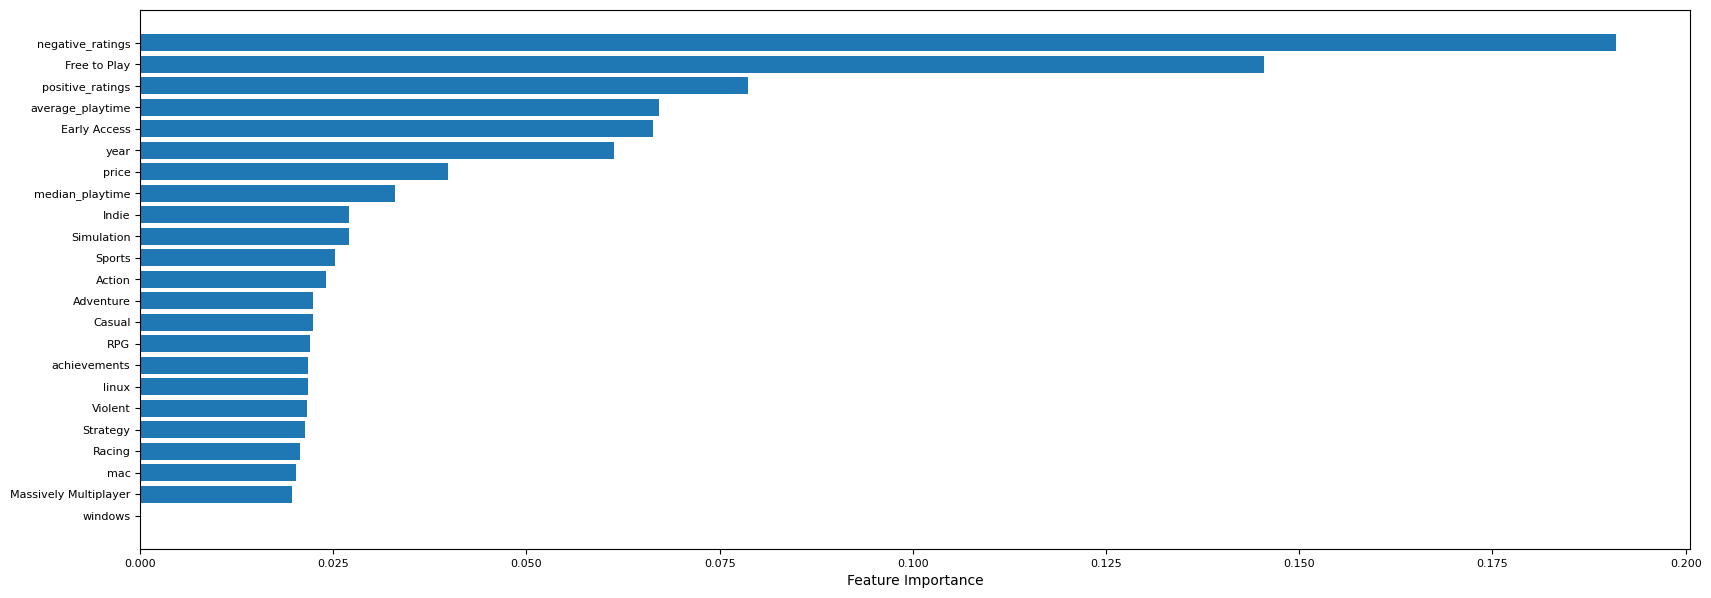

In [41]:
X = df.drop('target_encoded', axis=1)
y = df['target_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

importance = model.feature_importances_
feature_names = X.columns
sorted_idx = importance.argsort()
plt.figure(figsize=(20,7))
plt.barh(range(len(sorted_idx)), importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

The most important parameters for the number of users for a game on Steam is the number of negative ratings, if it is free to play and positive ratings. The results might be surprising for you, but don't fret! It is interesting to note that many developers and reserch teams also found this interesting corelation. 

https://www.researchgate.net/publication/228466586_The_Impact_of_Negative_Game_Reviews_and_User_Comments_on_Player_Experience This is link on research gate, a European commercial social networking site for scientists and researchers to share papers, ask and answer questions, and find collaborators.

The article "The Impact of Negative Game Reviews and User Comments on Player Experience" analyzes the effect of negative reviews and user comments on the player experience of video games.In the study, 234 gamers participated in an online survey to learn how their attitudes toward critical reviews and user comments affected their propensity to buy and play video games. 

The player experience can be significantly impacted by unfavorable game reviews and user comments, according to the findings. Comparatively to participants who did not read any bad reviews or comments, those who did were less likely to buy or play the game.Negative comments were found to have a stronger impact on players than negative reviews.

The research also found that the impact of unfavorable reviews and comments on player experience depended on how credible they were seen to be. Gamers were more likely to believe unfavorable remarks or reviews if they came from sources they considered reliable, such as expert game reviewers, rather than from sources that could not be identified or confirmed. 

The study emphasizes the significance of user feedback and unfavorable user reviews in influencing the player experience of video games. To enhance the overall user experience, game developers and publishers should pay attention to negative reviews and take action to address any issues mentioned by players. In order to have a greater impact on the user experience, game review websites and platforms should make sure that reviews and comments are reliable and trustworthy.